In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle 
path = '/content/drive/MyDrive/CS247'
with open(path+'/train_data.pkl', 'rb') as fid:
     train_data= pickle.load(fid)

with open(path+'/valid_data.pkl', 'rb') as fid:
     valid_data= pickle.load(fid)

with open(path+'/test_data.pkl', 'rb') as fid:
     test_data= pickle.load(fid)


In [ ]:
nan_value = float("NaN")

train_data.replace("", nan_value, inplace=True)

train_data.dropna(inplace=True)

valid_data.replace("",nan_value,inplace=True)
valid_data.dropna(inplace=True)

test_data.replace("",nan_value,inplace=True)
test_data.dropna(inplace=True)

In [ ]:
data = pd.concat([pd.concat([train_data, test_data]), valid_data])

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Target,comment_text_wp,comment_tokenize,comment,idleft
112366,591e7ceac4e56588,Would agree. While it's clear that GQ is ripe ...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",would agree clear gq ripe trek references refe...,"[would, agree, clear, gq, ripe, trek, referenc...",would agree while it is clear that gq is ripe ...,NaN
108254,42aab9d0fdd419ed,WrestleMania \n\nYou son of a bitch!!! a Moron!,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]",wrestlemania son bitch moron,"[wrestlemania, son, bitch, moron]",wrestlemania you son of a bitch a moron,NaN
57809,9abcc8c3f9280395,Larry Doby \n\nI've left some comments on that...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",larry doby left comments section talk page fee...,"[larry, doby, left, comments, section, talk, p...",larry doby i have left some comments on that s...,NaN
61339,a43208fc2de19df8,"""\n\nFor kicks, the primary author of """"Cartma...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",kicks primary author cartman gets anal probe f...,"[kicks, primary, author, cartman, gets, anal, ...",for kicks the primary author of cartman gets a...,NaN
158189,ea2714389f753568,""" edit area. Do not include the """"tlx|"""" code....",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",edit area include tlx code tlx unblock reason ...,"[edit, area, include, tlx, code, tlx, unblock,...",edit area do not include the tlx code tlx unbl...,NaN


In [ ]:
to_join = lambda x : " ".join(x)

In [ ]:
data['joined'] = data.comment_tokenize.apply(to_join)

In [ ]:
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Target,comment_text_wp,comment_tokenize,comment,idleft,joined
112366,591e7ceac4e56588,Would agree. While it's clear that GQ is ripe ...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",would agree clear gq ripe trek references refe...,"[would, agree, clear, gq, ripe, trek, referenc...",would agree while it is clear that gq is ripe ...,NaN,would agree clear gq ripe trek references refe...
108254,42aab9d0fdd419ed,WrestleMania \n\nYou son of a bitch!!! a Moron!,1,0,1,0,1,0,"[1, 0, 1, 0, 1, 0]",wrestlemania son bitch moron,"[wrestlemania, son, bitch, moron]",wrestlemania you son of a bitch a moron,NaN,wrestlemania son bitch moron
57809,9abcc8c3f9280395,Larry Doby \n\nI've left some comments on that...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",larry doby left comments section talk page fee...,"[larry, doby, left, comments, section, talk, p...",larry doby i have left some comments on that s...,NaN,larry doby left comments section talk page fee...
61339,a43208fc2de19df8,"""\n\nFor kicks, the primary author of """"Cartma...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",kicks primary author cartman gets anal probe f...,"[kicks, primary, author, cartman, gets, anal, ...",for kicks the primary author of cartman gets a...,NaN,kicks primary author cartman gets anal probe f...
158189,ea2714389f753568,""" edit area. Do not include the """"tlx|"""" code....",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",edit area include tlx code tlx unblock reason ...,"[edit, area, include, tlx, code, tlx, unblock,...",edit area do not include the tlx code tlx unbl...,NaN,edit area include tlx code tlx unblock reason ...


In [ ]:
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
dbs = {}

In [ ]:
dbs['healthy'] = data.copy()
for clss in classes:
  dbs[clss] = data[data[clss] == 1]
  dbs['healthy'] = dbs['healthy'][dbs['healthy'][clss] == 0]


In [ ]:
dbs['healthy'].head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,Target,comment_text_wp,comment_tokenize,comment,idleft,joined
112366,591e7ceac4e56588,Would agree. While it's clear that GQ is ripe ...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",would agree clear gq ripe trek references refe...,"[would, agree, clear, gq, ripe, trek, referenc...",would agree while it is clear that gq is ripe ...,NaN,would agree clear gq ripe trek references refe...
57809,9abcc8c3f9280395,Larry Doby \n\nI've left some comments on that...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",larry doby left comments section talk page fee...,"[larry, doby, left, comments, section, talk, p...",larry doby i have left some comments on that s...,NaN,larry doby left comments section talk page fee...
61339,a43208fc2de19df8,"""\n\nFor kicks, the primary author of """"Cartma...",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",kicks primary author cartman gets anal probe f...,"[kicks, primary, author, cartman, gets, anal, ...",for kicks the primary author of cartman gets a...,NaN,kicks primary author cartman gets anal probe f...
158189,ea2714389f753568,""" edit area. Do not include the """"tlx|"""" code....",0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",edit area include tlx code tlx unblock reason ...,"[edit, area, include, tlx, code, tlx, unblock,...",edit area do not include the tlx code tlx unbl...,NaN,edit area include tlx code tlx unblock reason ...
74544,c76ef728f11e3ed2,major edit without talk page discussion revert...,0,0,0,0,0,0,"[0, 0, 0, 0, 0, 0]",major edit without talk page discussion revert...,"[major, edit, without, talk, page, discussion,...",major edit without talk page discussion revert...,NaN,major edit without talk page discussion revert...


In [ ]:
dbs['healthy'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200589 entries, 112366 to 130420
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                143290 non-null  object
 1   comment_text      200589 non-null  object
 2   toxic             200589 non-null  int64 
 3   severe_toxic      200589 non-null  int64 
 4   obscene           200589 non-null  int64 
 5   threat            200589 non-null  int64 
 6   insult            200589 non-null  int64 
 7   identity_hate     200589 non-null  int64 
 8   Target            200589 non-null  object
 9   comment_text_wp   200589 non-null  object
 10  comment_tokenize  200589 non-null  object
 11  comment           200589 non-null  object
 12  idleft            57299 non-null   object
 13  joined            200589 non-null  object
dtypes: int64(6), object(8)
memory usage: 23.0+ MB


In [ ]:
dbs['healthy']['joined'].head()

112366    would agree clear gq ripe trek references refe...
57809     larry doby left comments section talk page fee...
61339     kicks primary author cartman gets anal probe f...
158189    edit area include tlx code tlx unblock reason ...
74544     major edit without talk page discussion revert...
Name: joined, dtype: object

In [ ]:
dbs['healthy']['insult'].head()

112366    0
57809     0
61339     0
158189    0
74544     0
Name: insult, dtype: int64

Code from: https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/

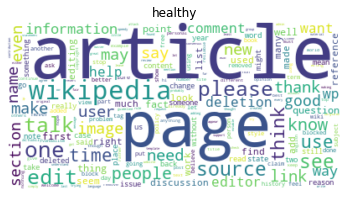

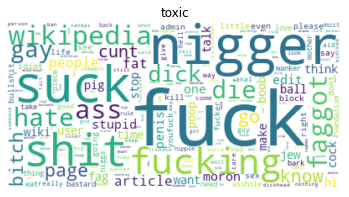

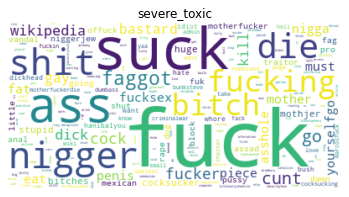

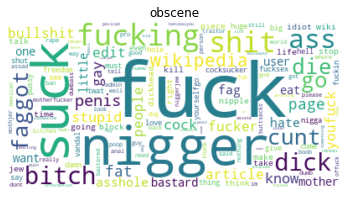

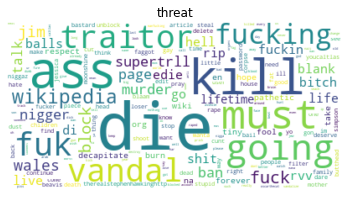

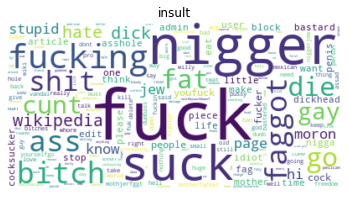

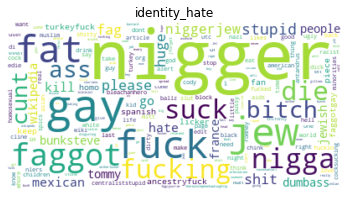

In [ ]:
for clss in dbs.keys():
  word_cloud = WordCloud(collocations = False, background_color = 'white').generate(dbs[clss]['joined'].str.cat())
  # Display the generated Word Cloud
  plt.title(clss)
  plt.imshow(word_cloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()
